In [1]:
import sys
import os
from icecream import ic

from pathlib import Path

import utils_behavior

from utils_behavior import Ballpushing_utils
from utils_behavior import Utils
from utils_behavior import Processing
from utils_behavior import HoloviewsTemplates

import pandas as pd
import hvplot.pandas
import numpy as np


# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import pandas as pd
#import pyarrow.feather as feather

import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas



import matplotlib.pyplot as plt
import seaborn as sns

import importlib



import holoviews as hv


hv.extension("bokeh")

ModuleNotFoundError: No module named 'Utils'

In [2]:
# Get the path to the data

Datapath = Utils.get_data_path()

In [3]:
# Find folders with "Learning or learning" in the name as a list

folders = [f for f in Datapath.glob("*FeedingState*")]

folders

[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240718_Afternoon_FeedingState_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_PM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240718_Afternoon_FeedingState_next_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230705_FeedingState_2_AM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230706_FeedingState_3_PM_Flipped_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230725_FeedingState_PM_Dark_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230727_FeedingState_PM_Dark_Flip_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230705_FeedingState_2_PM_Videos_Tracked')]

In [4]:
# Take the first 

exp = Ballpushing_utils.Experiment(folders[0])

Config loaded with the following parameters:
time_range: None
success_cutoff: False
success_cutoff_method: final_event
tracks_smoothing: True
downsampling_factor: None
generate_random: True
random_exclude_interactions: True
random_interaction_map: full
interaction_threshold: (0, 45)
gap_between_events: 1
events_min_length: 1
dead_threshold: 30
adjusted_events_normalisation: 1000
significant_threshold: 5
aha_moment_threshold: 20
success_direction_threshold: 25
final_event_threshold: 170
final_event_F1_threshold: 100
max_event_threshold: 10
template_width: 96
template_height: 516
padding: 20
y_crop: (74, 0)
contact_threshold: (0, 13)
gap_between_contacts: 0.5
contact_min_length: 0.5
skeleton_tracks_smoothing: False
hidden_value: 9999
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor1
Loading fly from

In [7]:
exp

Experiment(/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked)

In [44]:
# For each fly, get the ball positions

ball_positions = []

for fly in exp.flies:
    data = fly.tracking_data.balltrack.objects[0].dataset
    
    data["y_relative"] = abs(data["y_centre"] - data["y_centre"].iloc[0])
    data['fly'] = fly.metadata.name
    
    ball_positions.append(data)
    
ball_positions = pd.concat(ball_positions)

ball_positions.head()

#ball_positions['fly'].unique()
    
    

,frame,time,object,x_centre,y_centre,y_relative,fly
0,1,0.033333,ball_1,46.413479,331.692498,0.000000,230704_FeedingState_1_AM_Videos_Tracked_arena2...
1,2,0.066667,ball_1,46.413505,331.692508,0.000011,230704_FeedingState_1_AM_Videos_Tracked_arena2...
2,3,0.100000,ball_1,46.413530,331.692519,0.000021,230704_FeedingState_1_AM_Videos_Tracked_arena2...
3,4,0.133333,ball_1,46.413556,331.692530,0.000032,230704_FeedingState_1_AM_Videos_Tracked_arena2...
4,5,0.166667,ball_1,46.413582,331.692540,0.000043,230704_FeedingState_1_AM_Videos_Tracked_arena2...


In [46]:
# Now get the average ball positions grouped by time

grouped = ball_positions.groupby('time')["y_relative"].mean()

# Make it a dataframe

grouped = grouped.reset_index()

# Add co
grouped["ci"] = (ball_positions.groupby('time')["y_relative"].sem()) * 1.96


grouped

,time,y_relative,ci
0,0.033333,0.000000,NaN
1,0.066667,0.000284,0.004027
2,0.100000,0.000568,0.008193
3,0.133333,0.000853,0.012360
4,0.166667,0.001137,0.016060
...,...,...,...
215995,7199.866667,93.664370,NaN
215996,7199.900000,93.664707,NaN
215997,7199.933333,93.665045,NaN
215998,7199.966667,93.665382,NaN


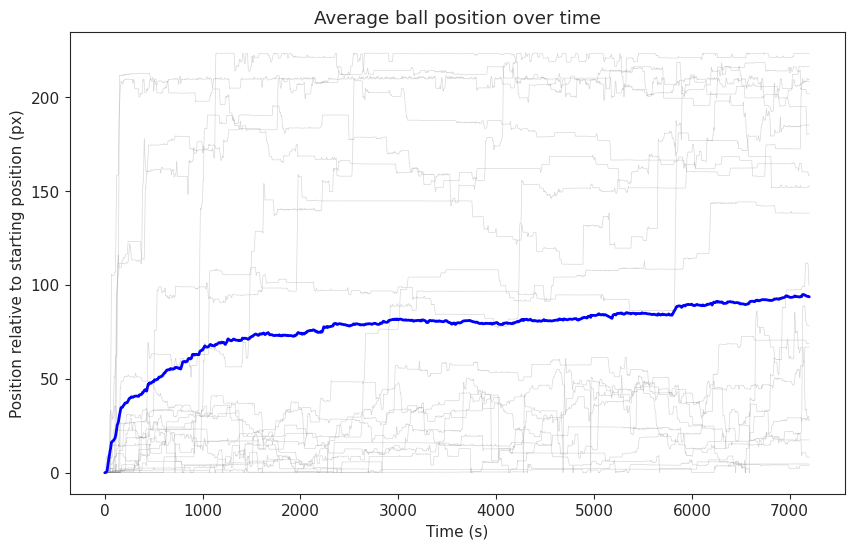

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

sns.set_style("white")
sns.set_style("ticks")

plt.rcParams.update({'font.size': 11})

# For each fly, get the ball positions
ball_positions = []

for fly in exp.flies:
    data = fly.tracking_data.balltrack.objects[0].dataset
    
    data["y_relative"] = abs(data["y_centre"] - data["y_centre"].iloc[0])
    data['fly'] = fly.metadata.name
    
    ball_positions.append(data)
    
ball_positions = pd.concat(ball_positions)

# Sample 20 flies from the pool of exp.flies
sampled_flies = np.random.choice(ball_positions['fly'].unique(), 20, replace=False)

# Now get the average ball positions grouped by time
grouped = ball_positions.groupby('time')["y_relative"].mean().reset_index()

# Plot the individual ball relative positions over time in thin gray lines for the sampled flies
plt.figure(figsize=(10, 6))
for fly in sampled_flies:
    sns.lineplot(x='time', y='y_relative', data=ball_positions[ball_positions['fly'] == fly], color='gray', alpha=0.3, linewidth=0.5)

# Plot the average ball positions over time in a thicker line
sns.lineplot(x='time', y='y_relative', data=grouped, label='Average ball position', color='blue', linewidth=2)

# Add a linear regression line to the plot and annotate the R2
# slope, intercept, r_value, p_value, std_err = linregress(grouped['time'], grouped['y_relative'])
# plt.plot(grouped['time'], slope * grouped['time'] + intercept, color='red', linestyle='--', alpha=0.5, label='Linear regression', linewidth=1)

# # Add the R2 to the plot
# plt.text(6500, 110, f"R2 = {r_value**2:.2f}", fontsize=12, color='red')

# Add title and labels
plt.title('Average ball position over time')
plt.xlabel('Time (s)')
plt.ylabel('Position relative to starting position (px)')
#plt.legend()
# Remove legend

plt.legend().remove()

plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/Article_Affordance/average_ball_position_over_time_Simple.png")
plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/Article_Affordance/average_ball_position_over_time_Simple.svg")
# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
Dataset = Ballpushing_utils.Dataset(exp)

In [ ]:
Dataset.generate_dataset(success_cutoff=False)

In [ ]:
Dataset.data.columns

In [ ]:
# Plot the yball_relative as a function of time grouped by individual flies

# curves = hv.Curve(Dataset.data, kdims=["time"], vdims=["yball_relative","fly"]).groupby("fly").overlay()

# curves.opts(width=800, height=400)

In [ ]:
from holoviews import opts
from bokeh.palettes import viridis

Tries = 30

NbFlies = 7

for i in range(Tries):

    # Pick random flies and plot their yball_relative as a function of time
    flies = np.random.choice(Dataset.data.fly.unique(), NbFlies)

    # Generate a Viridis palette with adapted number of colors colors
    viridis_palette = viridis(NbFlies)

    # Create the curves and overlay them
    curves = (
        hv.Curve(
            Dataset.data[Dataset.data.fly.isin(flies)],
            kdims=["time"],
            vdims=["yball_relative", "fly"],
        )
        .groupby("fly")
        .overlay()
    )

    curves = curves.opts(
        opts.Curve(
            width=800,
            height=400,
            show_grid=True,
            show_legend=False,
            ylabel="ball position relative to start (px)",
            xlabel="time (s)",
            
        )
    )

    # Apply the viridis colormap
    curves = curves.opts(opts.Curve(color=hv.Cycle(values=list(viridis_palette))))

    hv.save(curves, f"/mnt/upramdya_files/DURRIEU_Matthias/DlsImgs/testcurves{i}.png")

# Plotting curve with event start positions

In [36]:
exp = Ballpushing_utils.Experiment(folders[0])

Config loaded with the following parameters:
time_range: None
success_cutoff: False
success_cutoff_method: final_event
tracks_smoothing: True
downsampling_factor: None
generate_random: True
random_exclude_interactions: True
random_interaction_map: full
interaction_threshold: (0, 45)
gap_between_events: 1
events_min_length: 1
dead_threshold: 30
adjusted_events_normalisation: 1000
significant_threshold: 5
aha_moment_threshold: 20
success_direction_threshold: 25
final_event_threshold: 170
final_event_F1_threshold: 100
max_event_threshold: 10
template_width: 96
template_height: 516
padding: 20
y_crop: (74, 0)
contact_threshold: (0, 13)
gap_between_contacts: 0.5
contact_min_length: 0.5
skeleton_tracks_smoothing: False
hidden_value: 9999
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor1
Loading fly from

NameError: name 'Ballpushing_utils' is not defined

In [5]:
Dataset = Ballpushing_utils.Dataset(exp)

Config loaded with the following parameters:
time_range: None
success_cutoff: False
success_cutoff_method: final_event
tracks_smoothing: True
downsampling_factor: None
generate_random: True
random_exclude_interactions: True
random_interaction_map: full
interaction_threshold: (0, 45)
gap_between_events: 1
events_min_length: 1
dead_threshold: 30
adjusted_events_normalisation: 1000
significant_threshold: 5
aha_moment_threshold: 20
success_direction_threshold: 25
final_event_threshold: 170
final_event_F1_threshold: 100
max_event_threshold: 10
template_width: 96
template_height: 516
padding: 20
y_crop: (74, 0)
contact_threshold: (0, 13)
gap_between_contacts: 0.5
contact_min_length: 0.5
skeleton_tracks_smoothing: False
hidden_value: 9999


In [6]:
Dataset.data.head()

,index,time,frame,adjusted_time,x_fly_0,y_fly_0,distance_fly_0,x_ball_0,y_ball_0,distance_ball_0,...,Nickname,Brain region,Simplified Nickname,Split,Date,Genotype,Period,FeedingState,Orientation,Light
0,0,0.033333,1,NaN,0.000000,0.000000,0.000000,2.359147,-153.263031,0.000000,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
1,1,0.066667,2,NaN,-0.000004,-0.000222,0.000222,2.359172,-153.263020,0.000028,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
2,2,0.100000,3,NaN,-0.000008,-0.000443,0.000443,2.359198,-153.263010,0.000056,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
3,3,0.133333,4,NaN,-0.000012,-0.000665,0.000665,2.359224,-153.262999,0.000084,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
4,4,0.166667,5,NaN,-0.000016,-0.000887,0.000887,2.359250,-153.262988,0.000112,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on


In [7]:
SubsetFly = Dataset.data[Dataset.data["fly"] == Dataset.data["fly"].unique()[0]]

SubsetFly["interaction_event_onset"].unique()

array([ nan,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120.])

In [8]:
SubsetFly[SubsetFly["interaction_event_onset"].notna()]

,index,time,frame,adjusted_time,x_fly_0,y_fly_0,distance_fly_0,x_ball_0,y_ball_0,distance_ball_0,...,Nickname,Brain region,Simplified Nickname,Split,Date,Genotype,Period,FeedingState,Orientation,Light
2822,2822,94.100000,2823,NaN,-2.834967,-124.836398,124.868584,2.506980,-157.141552,3.881337,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
5139,5139,171.333333,5140,NaN,-0.295812,-230.923757,230.923946,1.953448,-263.728655,110.466370,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
6505,6505,216.866667,6506,NaN,5.103840,-227.293191,227.350487,2.195427,-265.083528,111.820617,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
7143,7143,238.133333,7144,NaN,8.311673,-232.330434,232.479063,2.014392,-265.450389,112.187888,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
8623,8623,287.466667,8624,NaN,6.358931,-232.924924,233.011709,-0.338805,-266.578372,113.347455,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209517,209517,6983.933333,209518,NaN,6.631393,-317.672929,317.742136,-0.663449,-355.995743,202.755243,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
210643,210643,7021.466667,210644,NaN,0.823694,-329.244058,329.245089,-0.754106,-358.834396,205.594938,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
212714,212714,7090.500000,212715,NaN,-2.809912,-334.077343,334.089160,-0.401028,-367.020471,213.775260,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
213499,213499,7116.666667,213500,NaN,7.268982,-334.806772,334.885671,0.084896,-369.497461,216.246389,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on


In [9]:
#Show rows where interaction_event_onset is not NaN

Dataset.data[Dataset.data["interaction_event_onset"].notna()]

,index,time,frame,adjusted_time,x_fly_0,y_fly_0,distance_fly_0,x_ball_0,y_ball_0,distance_ball_0,...,Nickname,Brain region,Simplified Nickname,Split,Date,Genotype,Period,FeedingState,Orientation,Light
2822,2822,94.100000,2823,NaN,-2.834967,-124.836398,124.868584,2.506980,-157.141552,3.881337,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
5139,5139,171.333333,5140,NaN,-0.295812,-230.923757,230.923946,1.953448,-263.728655,110.466370,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
6505,6505,216.866667,6506,NaN,5.103840,-227.293191,227.350487,2.195427,-265.083528,111.820617,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
7143,7143,238.133333,7144,NaN,8.311673,-232.330434,232.479063,2.014392,-265.450389,112.187888,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
8623,8623,287.466667,8624,NaN,6.358931,-232.924924,233.011709,-0.338805,-266.578372,113.347455,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11428911,196911,6563.733333,196912,NaN,-7.646745,-155.220275,155.408515,-6.943893,-198.020634,32.579931,...,PR,Control,PR,m,230704,PR,AM,Fed,std,on
11429256,197256,6575.233333,197257,NaN,-8.724888,-160.103734,160.341290,-6.945290,-199.291250,33.841127,...,PR,Control,PR,m,230704,PR,AM,Fed,std,on
11431245,199245,6641.533333,199246,NaN,0.688098,-162.002997,162.004458,-6.976877,-197.837712,32.402613,...,PR,Control,PR,m,230704,PR,AM,Fed,std,on
11440822,208822,6960.766667,208823,NaN,-4.460418,-149.610315,149.676791,-5.278319,-189.435726,23.861222,...,PR,Control,PR,m,230704,PR,AM,Fed,std,on


In [10]:
# Let's try to get the events for one fly

ex_fly = Dataset.data[Dataset.data['fly'] == Dataset.data['fly'].unique()[1]]

In [11]:
ex_fly["interaction_event"]

216000   NaN
216001   NaN
216002   NaN
216003   NaN
216004   NaN
          ..
431995   NaN
431996   NaN
431997   NaN
431998   NaN
431999   NaN
Name: interaction_event, Length: 216000, dtype: float64

In [12]:
# Check non null values

ex_fly["interaction_event"].notnull().sum()

20812

In [15]:
events

[]

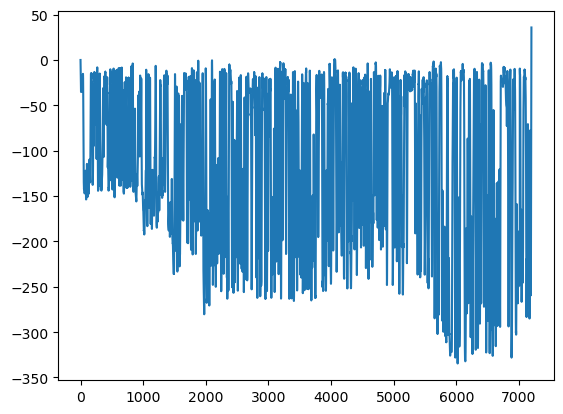

In [16]:
# Plot y fly

plt.plot(ex_fly["time"], ex_fly["y_fly_0"])

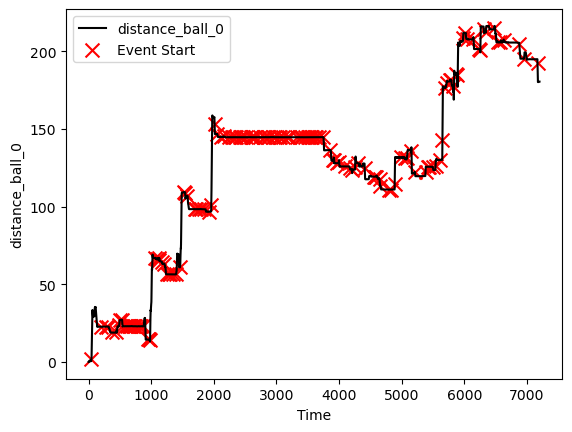

In [41]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot yball_relative over time
ax.plot(ex_fly["time"], ex_fly["distance_ball_0"], label="distance_ball_0", color="black")

# Find the beginning of each event
event_starts = (
    ex_fly.dropna(subset=["interaction_event"])
    .groupby("interaction_event")
    .first()
    .reset_index()
)

# Mark the beginning of each event with a red 'X'
ax.scatter(
    event_starts["time"],
    event_starts["distance_ball_0"],
    color="red",
    marker="x",
    s=100,
    label="Event Start",
)

# Add labels and legend
ax.set_xlabel("Time")
ax.set_ylabel("distance_ball_0")
ax.legend()

# Show the plot
plt.show()

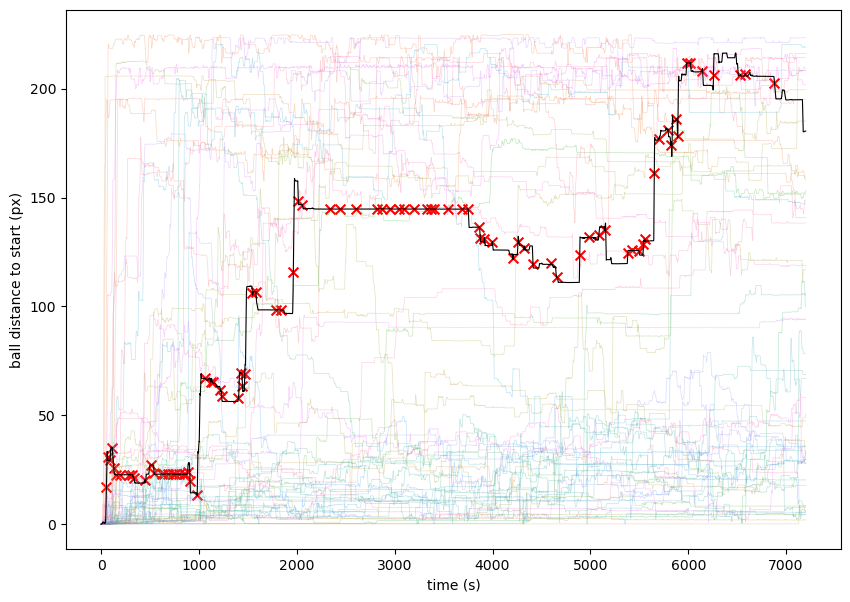

In [17]:
# Add a new column for distance in mm
Dataset.data["distance_ball_0_mm"] = Dataset.data["distance_ball_0"] / (500 / 30)  # 1 mm = 16.67 px

In [12]:
Dataset.data["distance_ball_0_mm_aligned"] = (
    Dataset.data.groupby("fly")["distance_ball_0_mm"]
    .transform(lambda x: x - x.iloc[0])
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


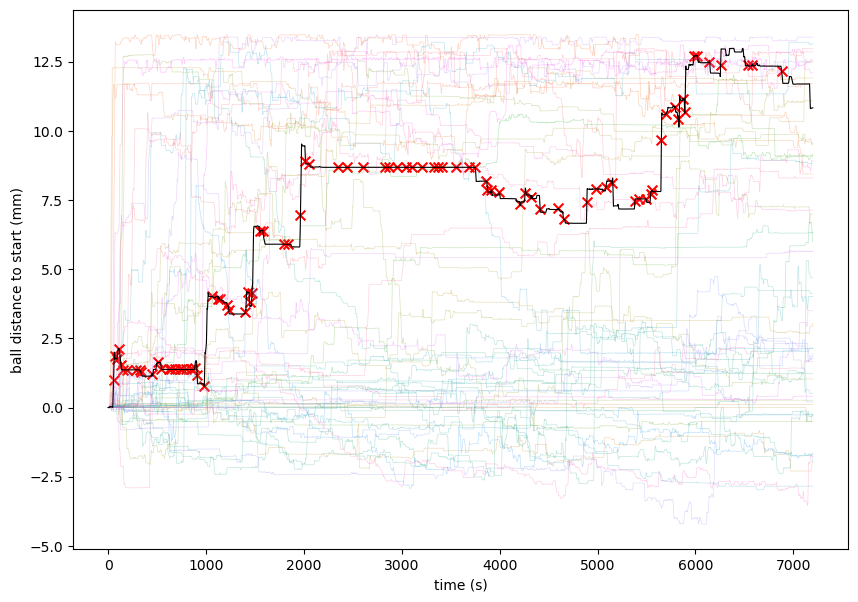

In [14]:
# Select the fly to highlight
highlight_fly_id = Dataset.data['fly'].unique()[1]  # Replace with the actual ID of the fly to highlight

plt.rcParams.update({'font.size': 10})

# Create a figure and axis with specific size

fig, ax = plt.subplots(figsize=(10, 7))

# Plot all other animals in shades of gray
other_flies = Dataset.data[Dataset.data["fly"] != highlight_fly_id]
sns.lineplot(
    data=other_flies,
    x="time",
    y="distance_ball_0_mm_aligned",
    hue="fly",
    palette=sns.color_palette("husl", len(other_flies["fly"].unique())),
    # palette="gray",
    alpha=0.3,
    linewidth=0.5,
    legend=False,
    ax=ax,
)

# Plot the highlighted animal in black
highlight_fly = Dataset.data[Dataset.data["fly"] == highlight_fly_id]
sns.lineplot(
    data=highlight_fly,
    x="time",
    y="distance_ball_0_mm_aligned",
    color="black",
    label="distance_ball_0_mm_aligned",
    linewidth=0.8,
    ax=ax,
)

# Find the beginning of each event for the highlighted animal
event_starts = (
    highlight_fly.dropna(subset=["interaction_event_onset"])
    .groupby("interaction_event_onset")
    .first()
    .reset_index()
)

# Mark the beginning of each event with a red 'X'
ax.scatter(
    event_starts["time"],
    event_starts["distance_ball_0_mm_aligned"],
    color="red",
    marker="x",
    s=50,
    label="Event Start",
)

# Add labels and remove legend
ax.set_xlabel("time (s)")
ax.set_ylabel("ball distance to start (mm)")
ax.legend().remove()

plt.savefig(
    "/mnt/upramdya_files/DURRIEU_Matthias/Pictures/Affordance_paper/BallTrajectories_2.svg",
    format="svg",
)

plt.savefig(
    "/mnt/upramdya_files/DURRIEU_Matthias/Pictures/Affordance_paper/BallTrajectories_2.eps",
    format="eps",
)

plt.savefig(
    "/mnt/upramdya_files/DURRIEU_Matthias/Pictures/Affordance_paper/BallTrajectories_2.pdf",
    format="pdf",
)


# Show the plot
plt.show()

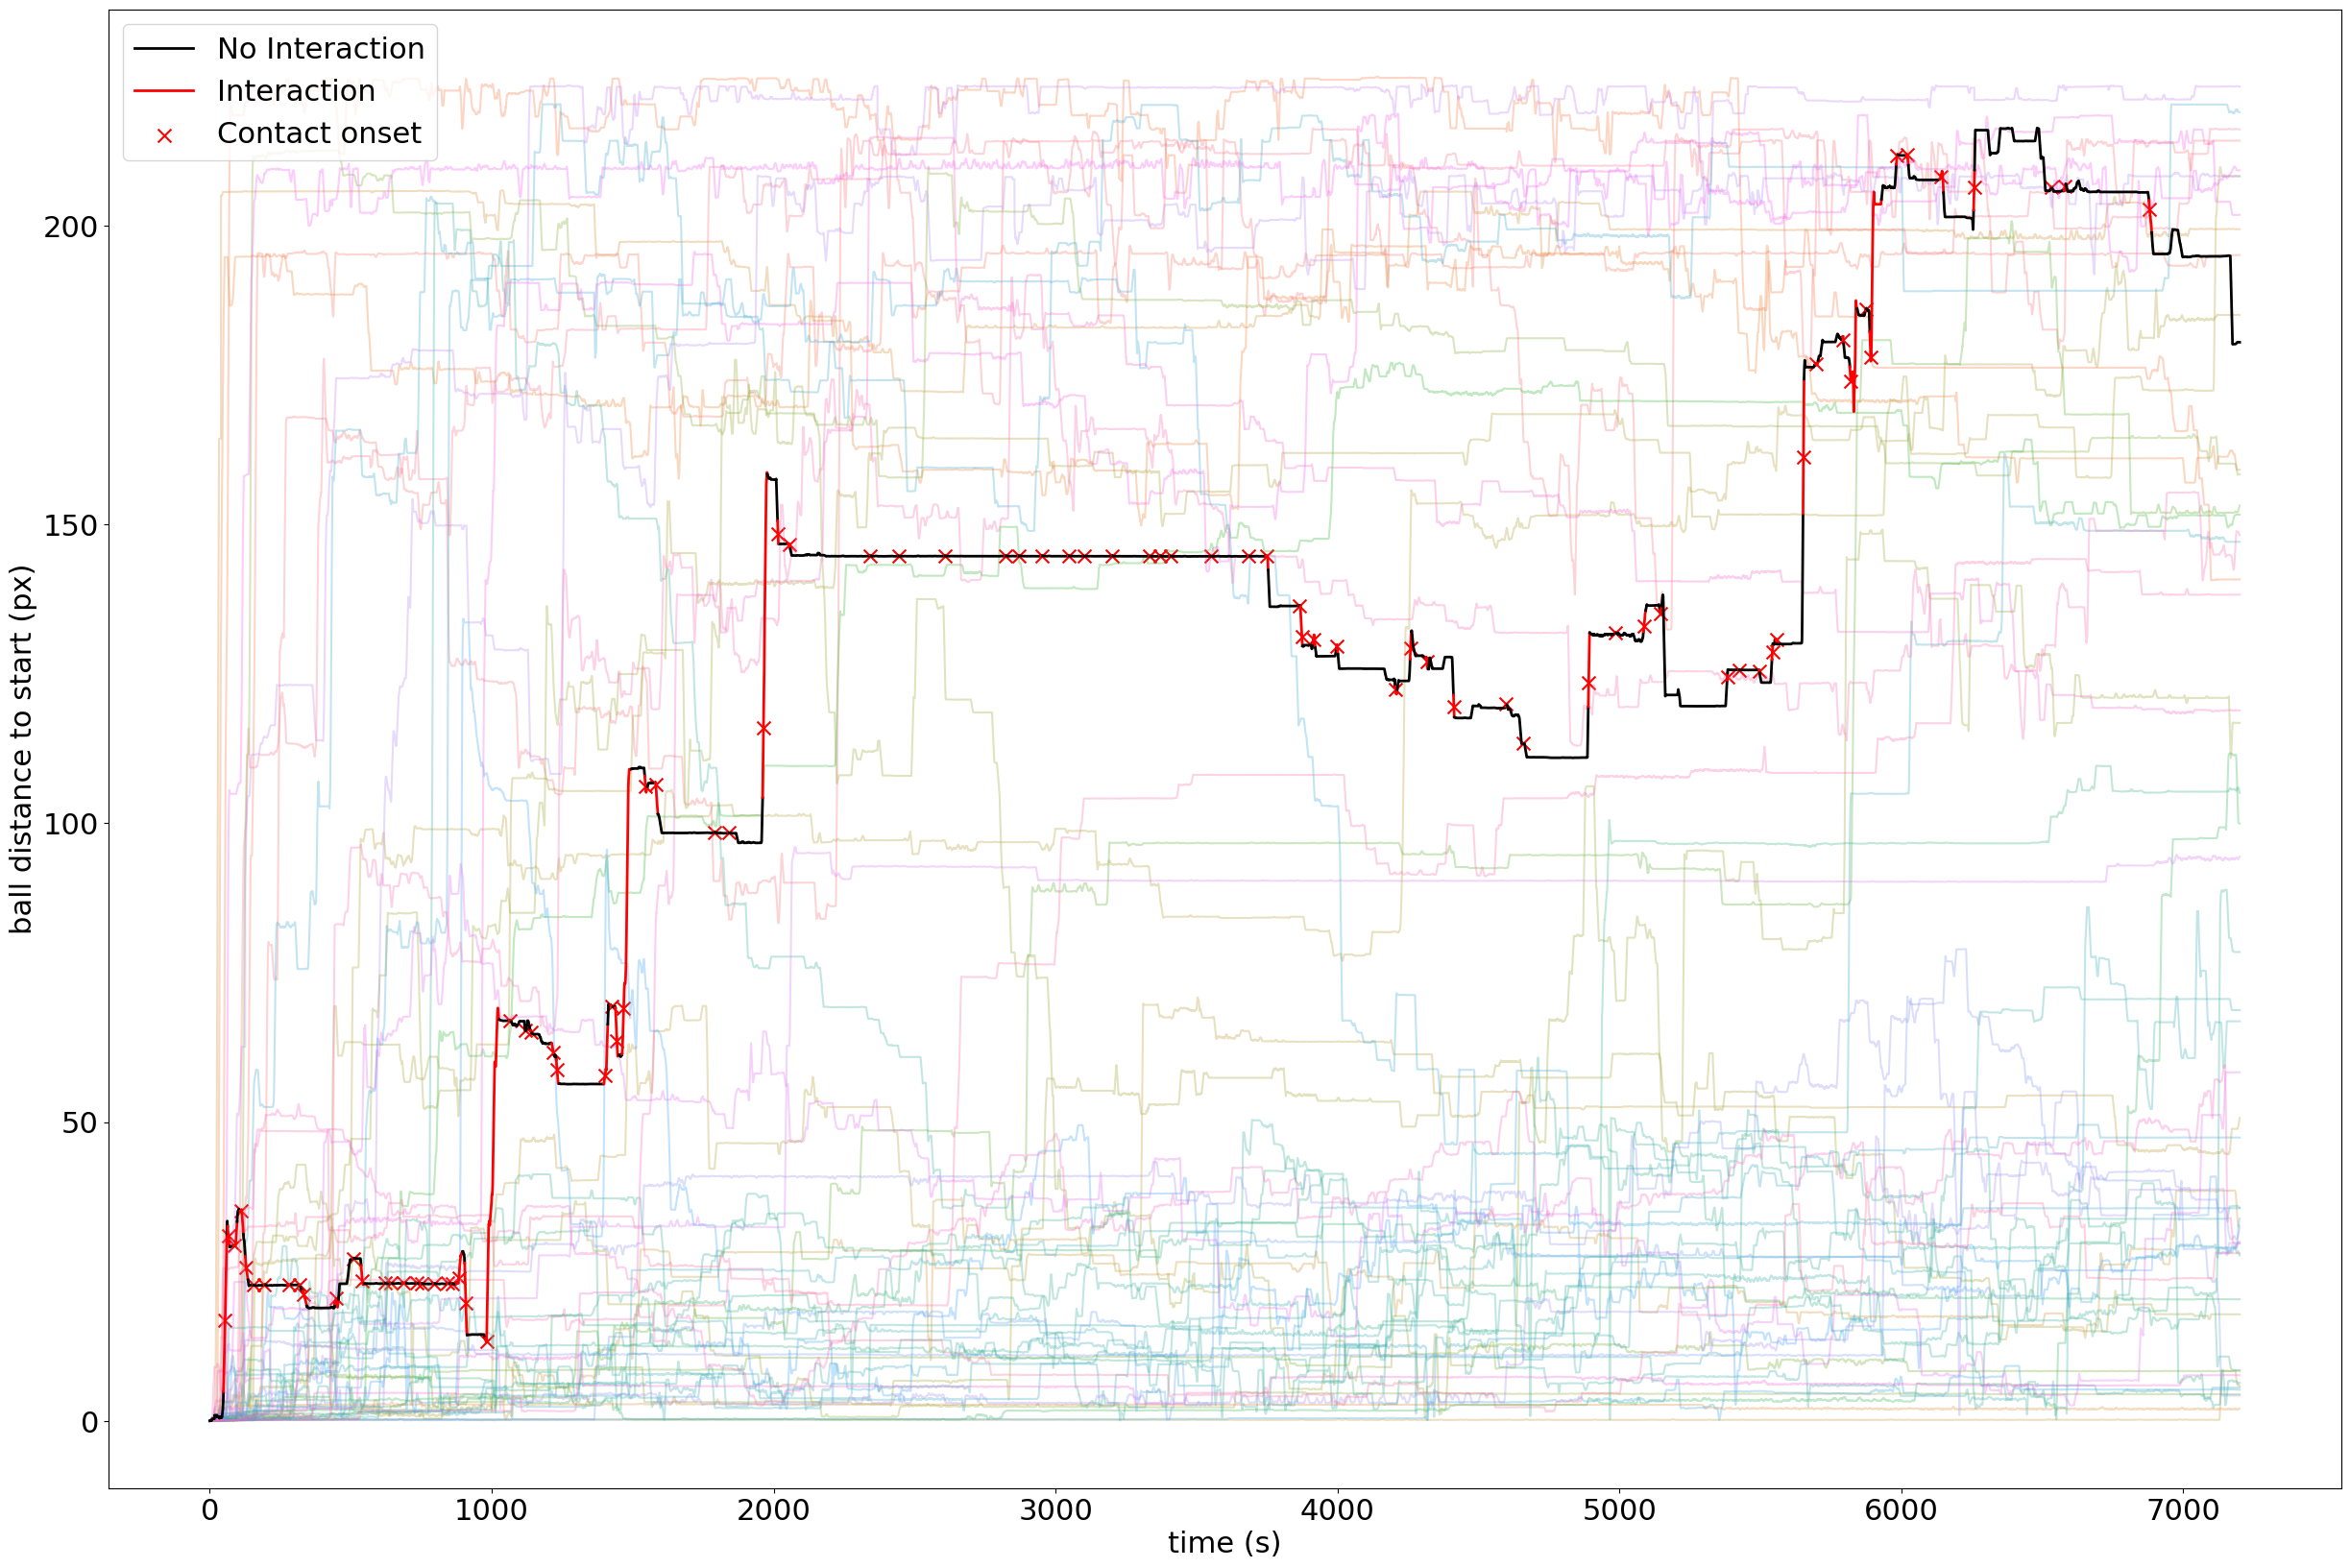

In [41]:
# Select the fly to highlight
highlight_fly_id = Dataset.data['fly'].unique()[1]  # Replace with the actual ID of the fly to highlight

plt.rcParams.update({'font.size': 22})

# Create a figure and axis with specific size
fig, ax = plt.subplots(figsize=(30, 20))

# Plot all other animals in shades of gray
other_flies = Dataset.data[Dataset.data["fly"] != highlight_fly_id]
sns.lineplot(
    data=other_flies,
    x="time",
    y="distance_ball_0_mm",
    hue="fly",
    palette=sns.color_palette("husl", len(other_flies["fly"].unique())),
    # palette="gray",
    alpha=0.3,
    legend=False,
    ax=ax,
)

# Get the highlighted fly data and sort by time
highlight_fly = Dataset.data[Dataset.data["fly"] == highlight_fly_id].sort_values("time")

# Create new columns to identify interaction segments
highlight_fly['is_interaction'] = ~highlight_fly["interaction_event"].isna()
highlight_fly['segment'] = (highlight_fly['is_interaction'] != highlight_fly['is_interaction'].shift()).cumsum()

# Plot each segment with appropriate color
legend_added = {'red': False, 'black': False}
for segment_id, segment in highlight_fly.groupby('segment'):
    color = 'red' if segment['is_interaction'].iloc[0] else 'black'
    
    # Only add label for the first occurrence of each color
    if not legend_added[color]:
        label = 'Interaction' if color == 'red' else 'No Interaction'
        legend_added[color] = True
    else:
        label = None
        
    ax.plot(segment["time"], segment["distance_ball_0_mm"], color=color, label=label, linewidth=2)

# Find the beginning of each event for the highlighted animal
event_starts = (
    highlight_fly.dropna(subset=["interaction_event_onset"])
    .groupby("interaction_event_onset")
    .first()
    .reset_index()
)

# Mark the beginning of each event with a red 'X'
ax.scatter(
    event_starts["time"],
    event_starts["distance_ball_0_mm"],
    color="red",
    marker="x",
    s=100,
    label="Contact onset",
)

# Add labels and legend
ax.set_xlabel("time (s)")
ax.set_ylabel("ball distance to start (mm)")
ax.legend()

# Place legend top left

plt.legend(loc='upper left')

plt.savefig(
    "/mnt/upramdya_files/DURRIEU_Matthias/Pictures/Affordance_paper/BallTrajectories_2_Withinteractions.svg",
    format="svg",
)

plt.savefig(
    "/mnt/upramdya_files/DURRIEU_Matthias/Pictures/Affordance_paper/BallTrajectories_2_Withinteractions.pdf",
    format="pdf",
)

# Show the plot
plt.show()